# PREDICIENDO VENTAS SEGÚN EL TIPO DE TRÁFICO DE UN SITIO WEB USANDO UN ENFOQUE DE MACHINE LEARNING

## INTRODUCCIÓN

El tráfico tipo, o "Traffic type", es crucial en marketing para identificar las fuentes de visitantes en un sitio web y comprender a los posibles clientes potenciales. Analizando el tráfico tipo, se obtienen conocimientos sobre el comportamiento, intereses y necesidades de la audiencia objetivo.

Por ejemplo, si la mayoría del tráfico proviene de redes sociales, sugiere que la audiencia objetivo es activa en esas plataformas y podría responder bien a campañas de marketing en redes sociales. Si un sitio web recibe muchas visitas desde motores de búsqueda, indica que la audiencia objetivo busca activamente información o productos relacionados, y mejorar el SEO sería efectivo para atraer nuevos clientes.

Al comprender la relación entre el tipo de tráfico y los ingresos generados, se pueden optimizar los esfuerzos de marketing al enfocarse en las fuentes de tráfico más rentables. También se pueden identificar áreas de mejora en el sitio web para aumentar la tasa de conversión y generar más ingresos por visita.

En resumen, el análisis del tráfico tipo y su relación con los ingresos permite tomar decisiones más informadas en términos de marketing y mejoras en el sitio web para maximizar las ventas y la satisfacción del cliente.

Se utiliza un dataset de: Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Real-time prediction of online shoppers’ purchasing intention using multilayer perceptron and LSTM recurrent neural networks. Neural Comput & Applic 31, 6893–6908 (2019). https://doi.org/10.1007/s00521-018-3523-0

## CARGA DE DATOS Y DE PAQUETES A UTILIZAR

In [147]:
# Librerías generales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
import seaborn as sns
import statsmodels
from scipy import stats
import statsmodels.stats.api as sms
import scipy.stats as stats


# Librerías Modelos y métricas de performance
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
!pip install xgboost
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import metrics
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from scipy.stats import randint, uniform


# Librerías para quitar mensajes de Warning
import warnings
warnings.filterwarnings('ignore')



In [148]:
# cargamos el df
archivo = '/content/online_shoppers_intention.csv'

df = pd.read_csv(archivo)

df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [149]:
# Se chequea que el dataset se haya cargado correctamente
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

## ANÁLISIS DE VARIABLES A UTILIZAR

In [150]:
df.describe()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [151]:
# Se chequea la correlación entre distintas variables
df.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,-0.006347,-0.025035,-0.005487,-0.033561,0.026417,0.138917
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,-0.007343,-0.015392,-0.005561,-0.014376,0.014990,0.093587
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,-0.009527,-0.038235,-0.029169,-0.034491,0.035785,0.095200
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,-0.009579,-0.019285,-0.027144,-0.024675,0.024078,0.070345
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.004290,-0.013146,-0.038122,-0.043064,0.016092,0.158538
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.002976,-0.007380,-0.033091,-0.036377,0.007311,0.152373
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,0.023823,-0.015772,-0.006485,0.078286,-0.046514,-0.150673
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,0.014567,-0.004442,-0.008907,0.078616,-0.062587,-0.207071
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.018508,0.045592,0.011315,0.012532,0.012002,0.492569
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,0.012652,0.003499,-0.016098,0.052301,-0.016767,-0.082305


Las características relevantes que usaremos en este caso son:

- **Revenue:** si se concretó una venta durante la visita; variable clave de interés. --- ***VARIABLE TARGET***

- **Page Values:**  es una métrica utilizada por Google Analytics para medir el valor de una página del sitioweb y compararla con la conversión que tuvo. Permite determinar cuánto Revenue una página está generando basado en el número de personas que visitó la página.

- **Traffic type:** Existen varios tipos de tráficos pero el dataset no utiliza labels sólo valores numéricos para separarlos por lo cual no se los puede distinguir.

- **Visitor Type :** indica si la visita al sitio web es de un visitante nuevo o recurrente.

- **Administrative, Administrative Duration, Informational, Informational Duration, Product Related and Product Related Duration:** representan el número de diferentes tipos de páginas que fueron visitadas en una sesión y la cantidad de tiempo que se pasó en cada categoría de página.

Sin embargo se decide dejar a las variables Operating Systems, Browser and Region ya que son de ayuda para definir el tipo de tráfico que recibe un sitio web.

# EDA




In [152]:
#se asigna una etiqueta a cada mes para que al utilizar la nueva columna quede ordenado
month_dict = {'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'June': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

df['Month_Ordered'] = df['Month'].map(month_dict)

df = df.sort_values(by='Month_Ordered')

df.drop(['Month'], axis=1, inplace=True)

df = df.reset_index(drop=True)



In [153]:
# Se convierte Revenue a integer
df['Revenue'] = df['Revenue'].astype(int)


In [154]:
# Eliminamos las filas que tengan na
df.dropna(inplace = True)

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  OperatingSystems         12330 non-null  int64  
 11  Browser                  12330 non-null  int64  
 12  Region                   12330 non-null  int64  
 13  TrafficType              12330 non-null  int64  
 14  VisitorType           

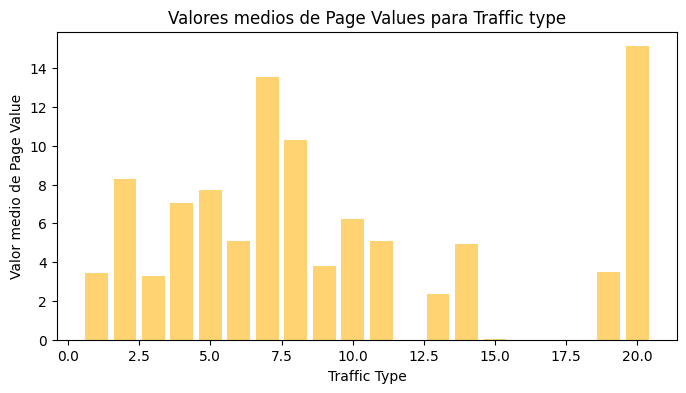

In [156]:
page_values = df.groupby('TrafficType')['PageValues'].mean()

fig, ax = plt.subplots(figsize=(8, 4))

colors = ['#FFD372'] * len(page_values)

ax.bar(page_values.index, page_values.values, color=colors)

ax.set_xlabel('Traffic Type')
ax.set_ylabel('Valor medio de Page Value')
ax.set_title('Valores medios de Page Values para Traffic type')

plt.show()

Si bien a simple vista parece que algunos tipos de tráficos tiene mejor Page value. También se analiza el conteo de incidencias de cada tipo de tráfico para analizar la relevancia según el porcentaje que representa del total de visitas.

In [157]:
df.describe()
#se chequea cuantos valores hay de cada uno
traffic_type_counts = df['TrafficType'].value_counts()
print(traffic_type_counts)

2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64


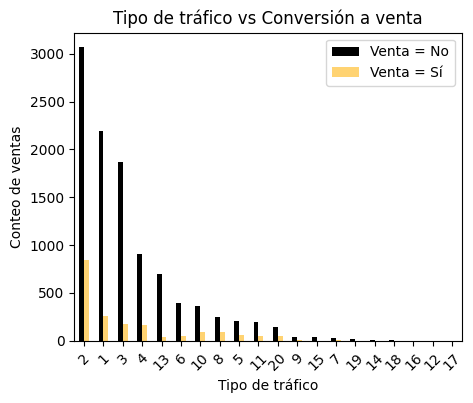

In [158]:
rev_0_count = df.loc[df['Revenue'] == 0, 'TrafficType'].value_counts()
rev_1_count = df.loc[df['Revenue'] == 1, 'TrafficType'].value_counts()

df_counts = pd.concat([rev_0_count, rev_1_count], axis=1)
df_counts.columns = ['Venta = No', 'Venta = Sí']

custom_yellow = '#FFD372'

fig, ax = plt.subplots(figsize=(5, 4))

df_counts.plot(kind='bar', ax=ax, color=['black', custom_yellow])
ax.set_xlabel('Tipo de tráfico')
ax.set_ylabel('Conteo de ventas')
ax.set_title('Tipo de tráfico vs Conversión a venta')
plt.xticks(rotation=45)
plt.show()


Con el fin de evaluar tendencias estacionales se evalúa las ventas por mes. Hay más ventas, Revenue=True, durante Marzo y Mayo, no existiendo información para Abril. De Julio a Septiembre parece haber un estancamiento del número de ventas. Hay un pico de ventas en Noviembre coincidiendo con el Black Friday.


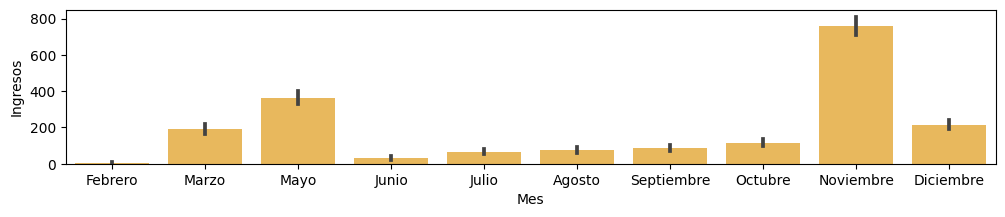

In [159]:
df['Revenue'] = df['Revenue'].astype(int)

sns.barplot(data=df, x='Month_Ordered', y='Revenue', estimator=np.sum, color='#FFBF46')

ax = plt.gca()
fig = plt.gcf()
fig.set_size_inches(12, 2)

labels = ['Febrero', 'Marzo', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
ax.set_xticklabels(labels)

plt.xlabel('Mes')
plt.ylabel('Ingresos')
plt.show()



In [160]:
df_ventas=df[['Month_Ordered', 'VisitorType']]
df_ventas.head()

,Month_Ordered,VisitorType
0,2,Returning_Visitor
1,2,Returning_Visitor
2,2,Returning_Visitor
3,2,Returning_Visitor
4,2,Returning_Visitor


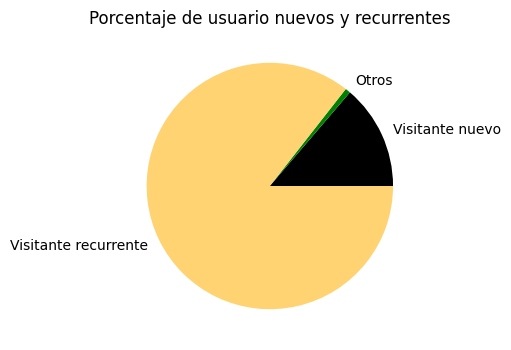

In [161]:
grouped = df_ventas.groupby('VisitorType')['VisitorType'].count()

plt.figure(figsize=(4, 4))

colors = ['black', 'green', '#FFD372']
labels = ['Visitante nuevo', 'Otros', 'Visitante recurrente']

plt.title('Porcentaje de usuario nuevos y recurrentes')
plt.pie(x=grouped, labels=labels, colors=colors)
plt.show()

In [162]:
mode = pd.Series(grouped).mode()
print('Mode:', mode)


Mode: 0       85
1     1694
2    10551
Name: VisitorType, dtype: int64


Al ser Returning Visitor y New Visitor variables categóricas se estudia la moda para analizar los valores que más aparecen.

*   Returning Visitor tiene una moda de 10551.
*   New Visitor tiene una moda de 1694.

Resulta evidente que la cantidad de nuevos visitantes es mínima respecto a los visitantes recurrentes, representando sólo el 13.7% del total de visitas.



Siguiendo con lo anterior, se evalua si cada tipo de cliente genera Revenue o no y si es durante un día de semana o no.La mayoría de las ventas se realizó durante un día de semana, Weekend=False.



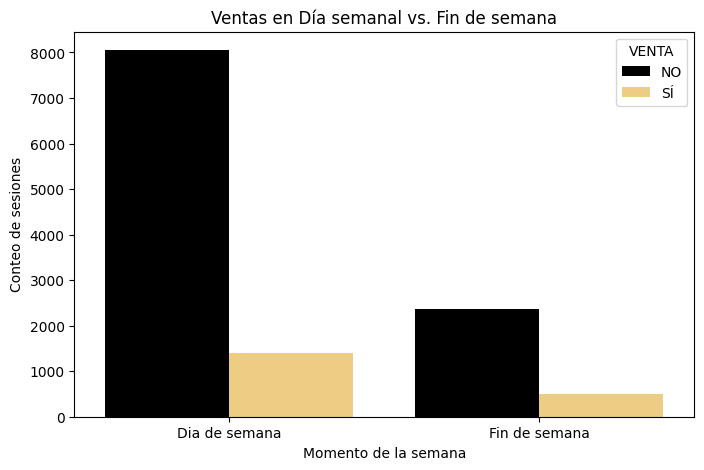

In [163]:
custom_palette = {0: 'black', 1: '#FFD372'}

sns.countplot(data=df, x='Weekend', hue='Revenue', palette=custom_palette)

plt.xticks([0, 1], ['Dia de semana', 'Fin de semana'])

plt.xlabel('Momento de la semana')
plt.ylabel('Conteo de sesiones')
plt.title('Ventas en Día semanal vs. Fin de semana')
plt.legend(title='VENTA', labels=['NO', 'SÍ'])

plt.show()


In [164]:
bounce_rate_gt_zero = df[df['BounceRates'] > 0]['BounceRates'].count()
total_sessions = df.shape[0]
percent_gt_zero = bounce_rate_gt_zero / total_sessions * 100

print(f"El porcentaje de sesiones con un bounce rate mayor a 0 es: {percent_gt_zero:.2f}%")

El porcentaje de sesiones con un bounce rate mayor a 0 es: 55.25%


Se evalua númericamente la correlación entre Bounce Rates y Exit Rates para luego graficarla utilizarla como referencia en un scatter plot entre ambas funciones.

In [165]:
corr = df['BounceRates'].corr(df['ExitRates'])

print(f"Correlación entre BounceRates y ExitRates: {corr:.3f}")

Correlación entre BounceRates y ExitRates: 0.913


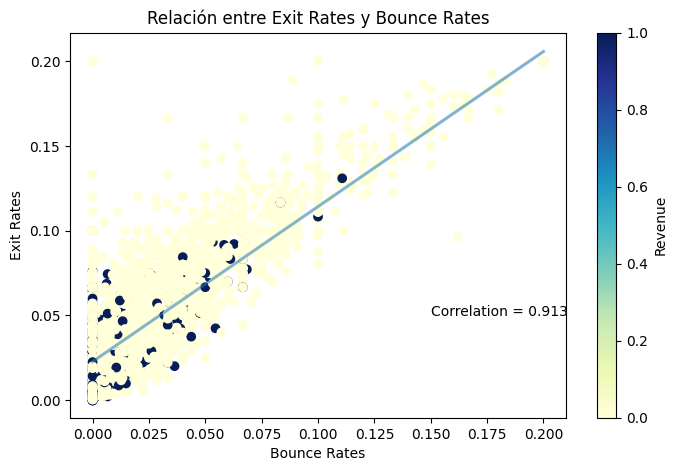

In [166]:
#scatter plot entre Exit y Bounce Rates

scatter_plot = plt.scatter(x=df['BounceRates'], y=df['ExitRates'], c=df['Revenue'], cmap=cm.YlGnBu)
plt.rcParams['figure.figsize'] = (8, 5)

scatter_plot.set_cmap(cm.YlGnBu)
scatter_plot.set_clim(0, 1)

cbar = plt.colorbar(scatter_plot)
cbar.set_label('Revenue')

# Se le agrega la línea de regresión
sns.regplot(x=df['BounceRates'], y=df['ExitRates'], scatter=False, line_kws={'alpha': 0.5})

plt.text(x=0.15, y=0.05, s='Correlation = 0.913')

plt.xlabel('Bounce Rates')
plt.ylabel('Exit Rates')
plt.title('Relación entre Exit Rates y Bounce Rates')


plt.show()


Dado que Exit Rate es una medida más específica del comportamiento de los usuarios que Bounce Rate, es más relevante utilizarla como variable dependiente. Esto podría ayudar a evaluar patrones o relaciones entre el sitio y los visitantes que solo se van para saber qué páginas optimizar

# INSIGHTS Y PRIMERAS RECOMENDACIONES


Con el fin de mejorar los resultados obtenidos se recomienda.

* Realizar un test A/B para mejorar el sitio web de tal manera que sea intuitivo.

* Mejorar la estrategia de SEO para que las visitas que lleguen a través de motores de búsqueda encuentren el contenido correcto.

* Mejorar el embudo de venta. Dado que la proporción de visitantes nuevos es baja, se recomienda enfocar las estrategias en primera instancia en generar brand awareness. Si bien es importante mantener clientes recurrentes, al acceder a un mercado mayor se puede generar un revenue mayor.

* Mejores estrategias de conversión. Haciendo foco en la atracción de clientes durante el fin de semana.

* Hacer uso de eventos de ventas como el Black Friday para atraer a nuevos clientes.




# BALANCEO DE CLASES

Ya que el dataset está desbalanceado, de las 12,330 sesiones el 84.5% (10,422), no resultaron en venta, es decir: Revenue=0. Al ser una diferencia demasiado grande se opta por el método de Undersampling y se eliminan aleatoriamente instancias negativas para alcanzar un porcentaje de 75% de instancias negativas contra un 25% de instancias positivas.

In [167]:
# se divide el dataset en 2
df_false = df[df['Revenue'] == 0]
df_true = df[df['Revenue'] == 1]

# Se determina el porcentaje que queremos tener al final
num_instances_false = int(0.75 * len(df_false))

#Se eligen al azar las instancias
df_false_sampled = df_false.sample(n=num_instances_false, random_state=42)

#Acá nos queda el df nuevo concatenado
df_balanced = pd.concat([df_false_sampled, df_true])

#Sobreescibo el anterior para no tener que cambiarlo en todo lo que hice
df = df_balanced


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9724 entries, 9192 to 12320
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           9724 non-null   int64  
 1   Administrative_Duration  9724 non-null   float64
 2   Informational            9724 non-null   int64  
 3   Informational_Duration   9724 non-null   float64
 4   ProductRelated           9724 non-null   int64  
 5   ProductRelated_Duration  9724 non-null   float64
 6   BounceRates              9724 non-null   float64
 7   ExitRates                9724 non-null   float64
 8   PageValues               9724 non-null   float64
 9   SpecialDay               9724 non-null   float64
 10  OperatingSystems         9724 non-null   int64  
 11  Browser                  9724 non-null   int64  
 12  Region                   9724 non-null   int64  
 13  TrafficType              9724 non-null   int64  
 14  VisitorType         

# TEST DE HIPÓTESIS


Se realiza una prueba para testear la hipótesis nula de que los días que no son SpecialDay hay más ventas. Es decir, se plantea que cuando SpecialDay=0, se generan más ventas en comparación a cuando SpecialDay>0.

Para ello se realiza una prueba de cola inferior (one-tailed test) para verificar si la media de las ventas en los días no especiales es mayor que la media de las ventas en los días especiales.

Dividimos el valor p por 2 (p_value/2) debido a que se trata de una prueba de cola inferior y solo estamos interesados en la probabilidad de obtener valores menores que el observado.

In [169]:
# Se divide la data en 2: SpecialDays y non-SpecialDays
special_days = df[df['SpecialDay'] > 0]['Revenue']
non_special_days = df[df['SpecialDay'] == 0]['Revenue']

# Se corre un t-test para comparar las ventas entre los 2 grupos
t_statistic, p_value = stats.ttest_ind(special_days, non_special_days, alternative='less')

print("T-Statistic:", t_statistic)
print("P-Value:", p_value/2)



T-Statistic: -9.715021797185896
P-Value: 8.206660369039937e-23


Estos resultados respaldan la idea de que las ventas en los días especiales son significativamente menores que las ventas en los días no especiales. El valor extremadamente bajo del P-Value indica una fuerte evidencia en contra de la hipótesis nula y sugiere que hay una diferencia significativa en las ventas entre los dos grupos.

En este contexto, los resultados sugieren que hay una diferencia significativa en las ventas entre los días especiales y los días no especiales y que las ventas en los **días especiales** son significativamente **menores** que las ventas en los días no especiales.

Por lo cual no se puede refutar la H0.

# FEATURE ENGINEERING



## TIME ON SITE




Una KPI habitual en Marketing digital es el tiempo que pasa el usuario en el sitio por lo que se crea una nueva columna uniendo Administrative_Duration, Informational_Duration y ProductRelated_Duration.

In [170]:
# creamos una lista con las 3 columnas de duración
duration_columns = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration']

# Creamos una nueva columna Time on Site para sumarlass
df['TimeOnSite'] = df[duration_columns].sum(axis=1)

# borramos las columnas originales
df.drop(duration_columns, axis=1, inplace=True)



In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9724 entries, 9192 to 12320
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Administrative    9724 non-null   int64  
 1   Informational     9724 non-null   int64  
 2   ProductRelated    9724 non-null   int64  
 3   BounceRates       9724 non-null   float64
 4   ExitRates         9724 non-null   float64
 5   PageValues        9724 non-null   float64
 6   SpecialDay        9724 non-null   float64
 7   OperatingSystems  9724 non-null   int64  
 8   Browser           9724 non-null   int64  
 9   Region            9724 non-null   int64  
 10  TrafficType       9724 non-null   int64  
 11  VisitorType       9724 non-null   object 
 12  Weekend           9724 non-null   bool   
 13  Revenue           9724 non-null   int64  
 14  Month_Ordered     9724 non-null   int64  
 15  TimeOnSite        9724 non-null   float64
dtypes: bool(1), float64(5), int64(9), obje

## TOTAL DE PÁGINAS VISITADAS

Otra métrica importante es el total de páginas que visitó el usuario. El dataset original distingue entre 3 tipos de páginas, dado que para nuestro análisis la distinción es irrelevante elegimos unificarlas en una sola columna.

In [172]:
# Creamos una lista con las columnas que tienen la información de cantidad de páginas visitadas
page_category_columns = ['Administrative', 'Informational', 'ProductRelated']

# Creamos una columna nueva 'Total_Pages_Visited'
df['TotalPagesVisited'] = df[page_category_columns].sum(axis=1)

# Eliminamos las columnas anteriores
df.drop(page_category_columns, axis=1, inplace=True)

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9724 entries, 9192 to 12320
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BounceRates        9724 non-null   float64
 1   ExitRates          9724 non-null   float64
 2   PageValues         9724 non-null   float64
 3   SpecialDay         9724 non-null   float64
 4   OperatingSystems   9724 non-null   int64  
 5   Browser            9724 non-null   int64  
 6   Region             9724 non-null   int64  
 7   TrafficType        9724 non-null   int64  
 8   VisitorType        9724 non-null   object 
 9   Weekend            9724 non-null   bool   
 10  Revenue            9724 non-null   int64  
 11  Month_Ordered      9724 non-null   int64  
 12  TimeOnSite         9724 non-null   float64
 13  TotalPagesVisited  9724 non-null   int64  
dtypes: bool(1), float64(5), int64(7), object(1)
memory usage: 1.0+ MB


Se decide eliminar la variante Visitor Type

In [173]:
df = df.drop("VisitorType", axis=1)

#  ELECCIÓN DE MODELO DE CLASIFICACIÓN PARA ENTRENAR EL MODELO

SELECCIÓN DE HIPERPARAMETROS

Usamos GridSearch para buscar los mejores híper parametros para los modelos seleccionados antes de entrenarlos.

In [174]:
X = df.drop(columns=['Revenue'])
y = df['Revenue']

# Dividir entre train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lista de modelos
models = [
    ("XGBoost", XGBClassifier(), {"model__learning_rate": [0.1, 0.01], "model__max_depth": [3, 5]}),
    ("Random Forest", RandomForestClassifier(), {"model__n_estimators": [50, 100, 200]}),
    ("Logistic Regression", LogisticRegression(), {"model__C": [1, 10], "model__solver": ["liblinear", "saga"]})
]

# Grid search para cada modelo
for model_name, model, param_grid in models:
    pipeline = Pipeline([
        ("model", model)
    ])

    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="accuracy")
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    print(f"Model: {model_name}")
    print(f"Best Parameters: {best_params}")
    print(f"Best Score: {best_score}\n")



Model: XGBoost
Best Parameters: {'model__learning_rate': 0.1, 'model__max_depth': 3}
Best Score: 0.8942041180700784

Model: Random Forest
Best Parameters: {'model__n_estimators': 200}
Best Score: 0.885719257061143

Model: Logistic Regression
Best Parameters: {'model__C': 10, 'model__solver': 'liblinear'}
Best Score: 0.8591086882847436



In [175]:
#Se busca mejorar el modelo de XGBoost
X = df.drop(columns=['Revenue'])
y = df['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el rango de hiperparámetros para la búsqueda aleatoria de XGBoost
param_dist = {
    'model__max_depth': randint(5, 35),
    'model__eta': uniform(0.01, 0.17),
    'model__colsample_bytree': uniform(0.83, 0.25),
    'model__min_child_weight': randint(1, 73),
    'model__max_delta_step': randint(0, 13),
    'model__gamma': uniform(1, 7.0),
    'model__subsample': uniform(0.83, 0.25)
}

# Crear el modelo XGBoost dentro del pipeline
xgboost_model = XGBClassifier()

# Crear el pipeline con el modelo
pipeline = Pipeline([
    ("model", xgboost_model)
])

# Realizar la búsqueda aleatoria de hiperparámetros
random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, cv=5, scoring="accuracy", n_iter=50, random_state=42)
random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_score = random_search.best_score_

print("Best Parameters for XGBoost:")
print(best_params)
print(f"Best Score: {best_score}\n")


Best Parameters for XGBoost:
{'model__colsample_bytree': 0.9282744311666901, 'model__eta': 0.16164791438010928, 'model__gamma': 5.41797038198084, 'model__max_delta_step': 1, 'model__max_depth': 25, 'model__min_child_weight': 30, 'model__subsample': 0.9912758405076412}
Best Score: 0.8934322485720662



SELECCIÓN DE MODELO DE BENCHMARK

Un modelo de benchmark se refiere a un punto de referencia o estándar utilizado para comparar el desempeño o la eficacia de otros modelos o enfoques. El modelo de benchmark generalmente es conocido por su buen desempeño y se utiliza como punto de referencia para medir si los nuevos modelos son capaces de superarlo o si presentan un rendimiento comparable. En nuestro caso elegimos usar un modelo de Regresión Logísitica dado que es un modelo flexible que permite trabajar con variables independientes de diferentes tipos (categóricas, binarias o continuas). En el caso del tipo de tráfico, una variable categórica, la regresión logística puede manejar eficazmente este tipo de datos y proporcionar predicciones precisas basadas en ellos.

REGRESIÓN LOGÍSTICA

In [176]:
# Sacamos la variable target
X = df.drop(['Revenue'], axis=1)
y = df['Revenue']

# Div. entre train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Usamos StandardScaler para estandarizar
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Se entrena el modelo
logreg = LogisticRegression(C=10, solver='liblinear', random_state=42, max_iter=1000)
logreg.fit(X_train_scaled, y_train)

# prediccion del test de testing
y_pred = logreg.predict(X_test_scaled)

# Evaluar la accuracy del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 score: {f1:.2f}")
print(f"ROC-AUC score: {roc_auc:.2f}")


Accuracy: 0.86
Precision: 0.77
Recall: 0.42
F1 score: 0.55
ROC-AUC score: 0.70


RANDOM FOREST

In [177]:

# Empezar y entrenar el Random Forest clasificador con los parametros
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train_scaled, y_train)

y_pred = rf.predict(X_test_scaled)

# Calculamos las métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"ROC-AUC score: {roc_auc:.2f}")


Accuracy: 0.884
Precision: 0.762
Recall: 0.618
F1 Score: 0.683
ROC-AUC score: 0.78


 XG.BOOST

In [178]:
X = df.drop(['Revenue'], axis=1)
y = df['Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = xgb.XGBClassifier(
    n_estimators=80,
    learning_rate=0.1,
    max_depth=25,
    colsample_bytree= 0.9282744311666901,
    eta=0.16164791438010928,
    gamma=5.41797038198084,
    max_delta_step=1,
    min_child_weight=30,
    subsample=0.9912758405076412,
    random_state=42
)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 score: {f1:.2f}")
print(f"ROC-AUC score: {roc_auc:.2f}")



Accuracy: 0.89
Precision: 0.75
Recall: 0.68
F1 score: 0.71
ROC-AUC score: 0.81


Hacemos las matrices de confusión para los 3 modelos elegidos.

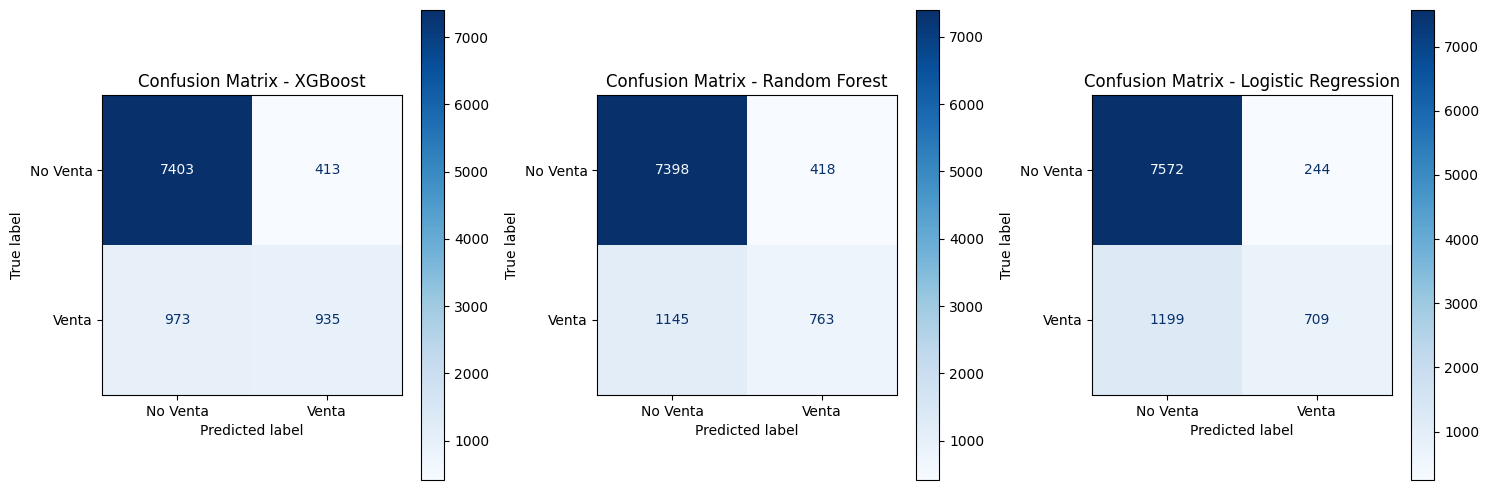

In [179]:
# Define the models of interest
models = [
    ("XGBoost", clf),
    ("Random Forest", rf),
    ("Logistic Regression", logreg)
]

# Set up plot
fig, axes = plt.subplots(nrows=1, ncols=len(models), figsize=(15, 5))

# Iterate over the models
for i, (model_name, model) in enumerate(models):
    # Use cross_val_predict to generate predictions
    y_pred = cross_val_predict(model, X, y, cv=5)

    # Compute the confusion matrix
    cm = confusion_matrix(y, y_pred)

    # Create confusion matrix display
    cm_display = ConfusionMatrixDisplay(cm, display_labels=["No Venta", "Venta"])

    # Plot confusion matrix
    ax = axes[i]
    cm_display.plot(ax=ax, cmap='Blues')
    ax.set_title(f"Confusion Matrix - {model_name}")

# Adjust spacing between subplots
plt.tight_layout()

# Show plot
plt.show()


VALIDACIÓN DE MODELOS

In [180]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import metrics


# Separate features and target variable
X = df.drop('Revenue', axis=1)
y = df['Revenue']

# Define the models
logistic_regression = LogisticRegression(max_iter=5000)
random_forest = RandomForestClassifier()
xgboost = XGBClassifier()

# Initialize performance metrics
accuracy_scores = {'Logistic Regression': [], 'Random Forest': [], 'XGBoost': []}

# Perform k-Fold Cross-Validation with k=5
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train and predict using Logistic Regression
    logistic_regression.fit(X_train, y_train)
    logistic_regression_pred = logistic_regression.predict(X_test)
    accuracy_scores['Logistic Regression'].append(metrics.accuracy_score(y_test, logistic_regression_pred))

    # Train and predict using Random Forest
    random_forest.fit(X_train, y_train)
    random_forest_pred = random_forest.predict(X_test)
    accuracy_scores['Random Forest'].append(metrics.accuracy_score(y_test, random_forest_pred))

    # Train and predict using XGBoost
    xgboost.fit(X_train, y_train)
    xgboost_pred = xgboost.predict(X_test)
    accuracy_scores['XGBoost'].append(metrics.accuracy_score(y_test, xgboost_pred))

# Calculate average performance
for model, scores in accuracy_scores.items():
    average_score = sum(scores) / len(scores)
    print(f"Average accuracy score for {model}: {average_score}")



Average accuracy score for Logistic Regression: 0.8589068731685128
Average accuracy score for Random Forest: 0.8850282987929375
Average accuracy score for XGBoost: 0.8807094798311594


# CONCLUSIONES

Basado en el análisis de las métricas y los resultados de los modelos, se pueden sacar las siguientes conclusiones:

1. Comparación de modelos: Se evaluaron tres modelos (Regresión Logística, Random Forest y XGBoost) utilizando diferentes métricas, incluyendo el ROC AUC. Se observa que el modelo XGBoost obtiene el mayor valor de ROC AUC (0.81), lo que indica una mejor capacidad de discriminación en la clasificación de las ventas según el tipo de tráfico. Esto sugiere que XGBoost tiene un rendimiento superior en comparación con los otros dos modelos evaluados.

2. Consideración de Falsos Positivos y Falsos Negativos: Aunque XGBoost muestra el mayor número de falsos positivos, se menciona que en el contexto de la industria del marketing, esta incidencia no es tan grave como para provocar el rechazo del modelo. Esto implica que los falsos positivos no tienen un impacto significativo en el rendimiento general del modelo en la predicción de ventas según el tipo de tráfico.

3. Importancia del ROC AUC: El ROC AUC se destaca como una métrica clave en este análisis. Se utiliza para comparar y evaluar modelos de clasificación en términos de su capacidad de discriminación. Los valores de ROC AUC obtenidos para cada modelo indican su habilidad para clasificar correctamente las ventas según el tipo de tráfico. En base a esto, el modelo XGBoost se considera el mejor modelo en este contexto.

En resumen, considerando las métricas evaluadas y la capacidad de discriminación medida por el ROC AUC, se concluye que el modelo XGBoost es el más adecuado para predecir las ventas según el tipo de tráfico en el proyecto de marketing.